# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [9]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('housing.csv')
print(df.columns)
df = df.dropna()
df.head()


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
X = df.drop(columns=['median_house_value']).copy()

X = pd.get_dummies(X, drop_first=True)

print(X.info())
X.head()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   ocean_proximity_INLAND      20433 non-null  bool   
 9   ocean_proximity_ISLAND      20433 non-null  bool   
 10  ocean_proximity_NEAR BAY    20433 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  20433 non-null  bool   
dtypes: bool(4), float64(8)
memory usage: 1.5 MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False


In [5]:
y = df.median_house_value
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

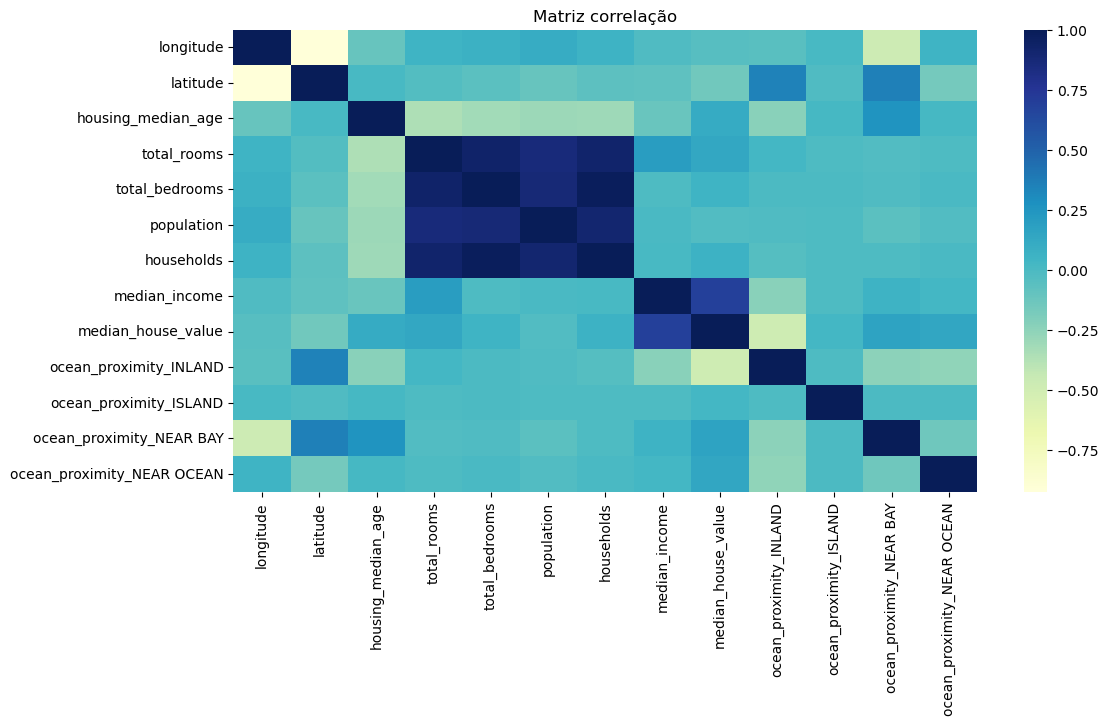

### variáveis_correlacionadas ###
total_rooms         total_bedrooms        0.930380
                    population            0.857281
                    households            0.918992
total_bedrooms      total_rooms           0.930380
                    population            0.877747
                    households            0.979728
population          total_rooms           0.857281
                    total_bedrooms        0.877747
                    households            0.907186
households          total_rooms           0.918992
                    total_bedrooms        0.979728
                    population            0.907186
median_income       median_house_value    0.688355
median_house_value  median_income         0.688355
dtype: float64


In [6]:
df = pd.get_dummies(df, drop_first=True)
### matriz de correlação e as variáveis correlacionadas para a predição da variável target
plt.figure(figsize=(12, 6))

matriz_correlacao = df.corr()
sns.heatmap(matriz_correlacao,cmap='YlGnBu')
plt.title('Matriz correlação')
plt.show()

ponto_corte = 0.5
matriz_correlacao = matriz_correlacao.unstack()
variaveis_correlacionadas = matriz_correlacao[(matriz_correlacao > ponto_corte) & (matriz_correlacao < 1)]
print('### variáveis_correlacionadas ###')
print(variaveis_correlacionadas)



### 3. Separe os dados em validação e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2360873, test_size=0.3)
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(20433, 12)
(14303, 12)
(6130, 12)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [8]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [13]:
# Predições para a base de treino e teste 
y_train_pred1 = regr_1.predict(X_train) 
y_train_pred2 = regr_2.predict(X_train) 
y_test_pred1 = regr_1.predict(X_test) 
y_test_pred2 = regr_2.predict(X_test) 
# Cálculo do MSE 
mse_train1 = mean_squared_error(y_train, y_train_pred1) 
mse_train2 = mean_squared_error(y_train, y_train_pred2) 
mse_test1 = mean_squared_error(y_test, y_test_pred1) 
mse_test2 = mean_squared_error(y_test, y_test_pred2) 
# Exibição dos resultados 
print('### Resultados ###') 
print(f'mse_train1: {mse_train1:.2f}') 
print(f'mse_train2: {mse_train2:.2f}') 
print(f'mse_test1: {mse_test1:.2f}') 
print(f'mse_test2: {mse_test2:.2f}')

### Resultados ###
mse_train1: 6741304193.14
mse_train2: 3100526615.64
mse_test1: 6742602943.50
mse_test2: 4054759393.44


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [15]:
print('### Melhor arvore ###')
print(f'mse_train1: {mse_train1:.2f}')
print(f'mse_teste1: {mse_test1:.2f}')
print('pois apresenta valores mais próximos de ZERO')



### Melhor arvore ###
mse_train1: 6741304193.14
mse_teste1: 6742602943.50
pois apresenta valores mais próximos de ZERO


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

## RESPOSTA ##
 median_income é a variável mais importante para a predição da variável target, pois aparece duas vezes na árvore de decisão


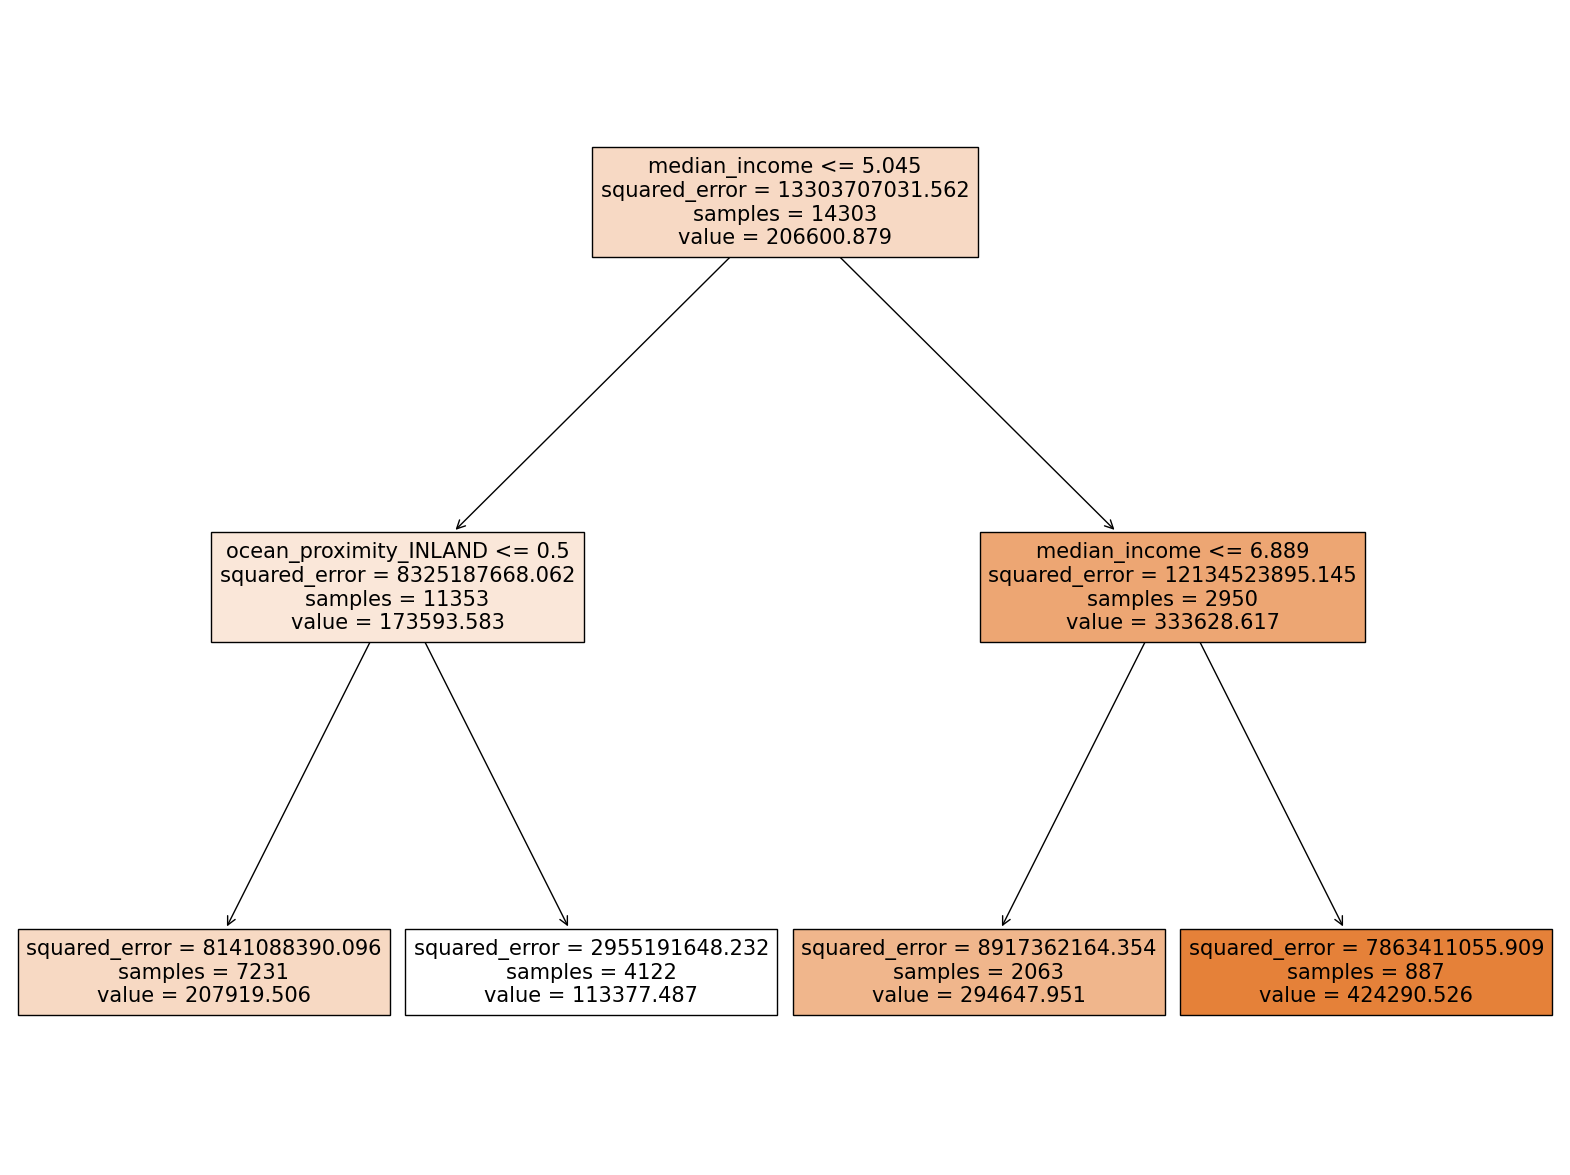

In [115]:
plt.figure(figsize=(20,15))
tree.plot_tree(regr_1,feature_names=X.columns,filled=True);
print('## RESPOSTA ##')
print(' median_income é a variável mais importante para a predição da variável target, pois aparece duas vezes na árvore de decisão')